# Experiments to determine model behavior across the parameter space

By using our random forcing and perturbations, we run our model hundreds of times for each combination of parameters and compute statistics on how often blocking occurs, and how large blocking events are. We can use this to make predictions for climate change. 

In [1]:
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True

### What effect does the C(x) background wavenumber (normally n=2) have?

In [2]:
wavenum = np.load("wavenum.npy",encoding='latin1').item()

In [3]:
wavenums = wavenum["var"]

In [4]:
avgnblocks = []
avgblocksz = []
stdnblocks = []
stdblocksz = []
avgnblockspe = []
avgblockszpe = []
stdnblockspe = []
stdblockszpe = []
wnevents = []
wstdevents = []

In [5]:
len(wavenum["data"])

10

In [6]:
for run in wavenum["data"]:
    avgnblocks.append(run["avg_nblocks"])
    avgblocksz.append(run["avg_blocksize"])
    stdnblocks.append(run["std_nblocks"])
    stdblocksz.append(run["std_blocksize"])
    avgnblockspe.append(run["avg_nblocks_perevent"])
    avgblockszpe.append(run["avg_blocksize_perevent"])
    stdnblockspe.append(run["std_nblocks_perevent"])
    stdblockszpe.append(run["std_blocksize_perevent"])
    eventsn = np.zeros(10)
    for n in range(0,10):
        eventsn[n] = len(run["forcing_coords"][n][0])
    wnevents.append(np.mean(eventsn))
    wstdevents.append(np.std(eventsn))

In [7]:
len(avgnblocks)

10

Text(0, 0.5, 'Average Number of Blocking Events')

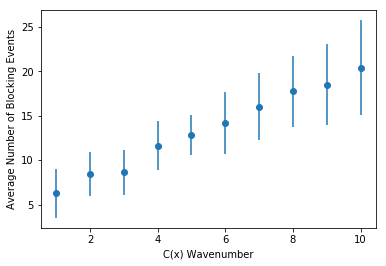

In [8]:
plt.errorbar(wavenums,avgnblocks,yerr=stdnblocks,fmt='o')
plt.xlabel("C(x) Wavenumber")
plt.ylabel("Average Number of Blocking Events")

## 1b

Number of blocking events increase.

Text(0, 0.5, 'Average Number of Blocking Events per Significant Forcing')

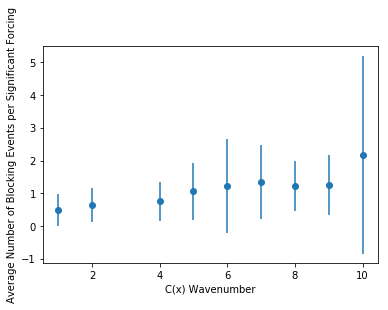

In [9]:
plt.errorbar(wavenums,avgnblockspe,yerr=stdnblockspe,fmt='o')
plt.xlabel("C(x) Wavenumber")
plt.ylabel("Average Number of Blocking Events per Significant Forcing")

Text(0, 0.5, 'Average Blocking Pixels')

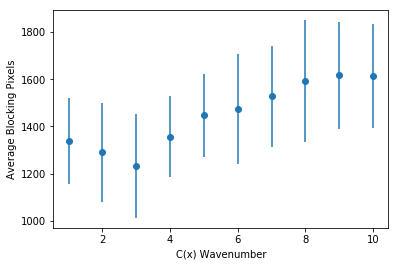

In [10]:
plt.errorbar(wavenums,avgblocksz,yerr=stdblocksz,fmt='o')
plt.xlabel("C(x) Wavenumber")
plt.ylabel("Average Blocking Pixels")

## 1a

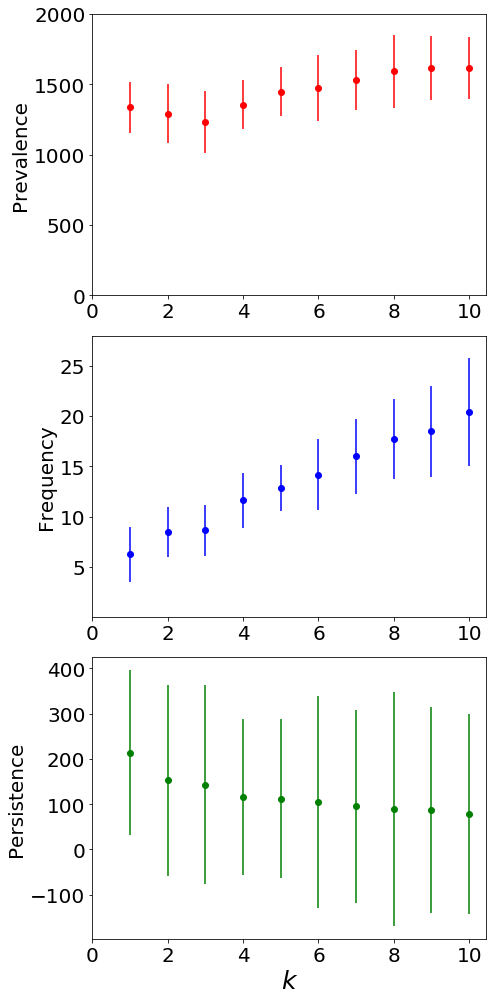

In [11]:
plt.figure(figsize=(7,14))

plt.subplot(3,1,1)

plt.errorbar(wavenums,avgblocksz,yerr=stdblocksz,fmt='ro')
# plt.xlabel("C(x) Amplitude", fontsize=18)
plt.ylabel("Prevalence", fontsize=20)
# plt.title("Prevalence of Blocking", fontsize=18, y=1.05)
plt.xticks(np.arange(0,12,2),fontsize=20)
plt.yticks(np.arange(0,1800+500,500),fontsize=20)

plt.subplot(3,1,2)

plt.errorbar(wavenums,avgnblocks,yerr=stdnblocks,fmt='bo')
# plt.xlabel("C(x) Amplitude", fontsize=18)
plt.ylabel("Frequency", fontsize=20)
# plt.title("Blocking Frequency", fontsize=18,y=1.05)
plt.xticks(np.arange(0,12,2),fontsize=20)
plt.yticks(np.arange(5,30,5),fontsize=20)
plt.ylim(0,28)


plt.subplot(3,1,3)
plt.errorbar(wavenums,np.array(avgblocksz)/np.array(avgnblocks),
             yerr=np.sqrt(np.array(stdnblocks)**2+np.array(stdblocksz)**2),
             fmt='go')
plt.ylabel("Persistence", fontsize=20)
# plt.title("Average Size/Duration of Each Block", fontsize=18,y=1.05)
plt.xticks(np.arange(0,12,2),fontsize=20)
plt.yticks(fontsize=20)
# plt.ylim(0,500)

plt.xlabel(r"$k$", fontsize=25,y=1.10)


plt.tight_layout()
# plt.savefig('figure_pdf/wavenum.pdf')
plt.show()


Text(0, 0.5, 'Average Blocking Pixels/Block')

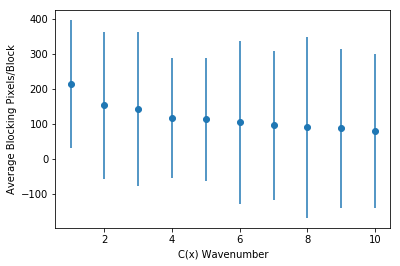

In [12]:
plt.errorbar(wavenums,np.array(avgblocksz)/np.array(avgnblocks),
             yerr=np.sqrt(np.array(stdnblocks)**2+np.array(stdblocksz)**2),
             fmt='o')
plt.xlabel("C(x) Wavenumber")
plt.ylabel("Average Blocking Pixels/Block")

## 1c

The size of the blocks might get smaller, but we lack statistical strength here.

Text(0, 0.5, 'Average Blocking Pixels per Significant Forcing')

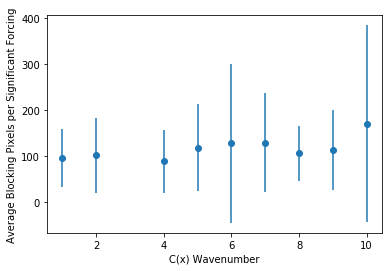

In [13]:
plt.errorbar(wavenums,avgblockszpe,yerr=stdblockszpe,fmt='o')
plt.xlabel("C(x) Wavenumber")
plt.ylabel("Average Blocking Pixels per Significant Forcing")

Text(0, 0.5, 'Number of blocks')

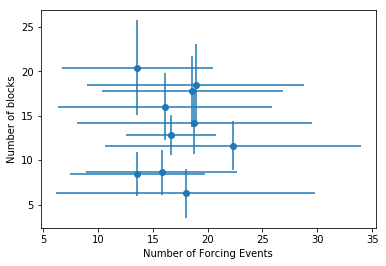

In [14]:
plt.errorbar(wnevents,avgnblocks,xerr=wstdevents,yerr=stdnblocks,fmt='o')
plt.xlabel("Number of Forcing Events")
plt.ylabel("Number of blocks")

Text(0, 0.5, 'Average Block Size [pixels]')

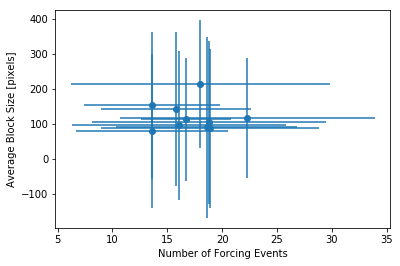

In [15]:
plt.errorbar(wnevents,np.array(avgblocksz)/np.array(avgnblocks),xerr=wstdevents,
             yerr=np.sqrt(np.array(stdnblocks)**2+np.array(stdblocksz)**2),fmt='o')
plt.xlabel("Number of Forcing Events")
plt.ylabel("Average Block Size [pixels]")

### What effect does varying the forcing strength have?

In [16]:
fpeak = np.load("fpeak.npy",encoding='latin1').item()

In [17]:
fpeak.keys()

dict_keys(['var', 'data'])

In [18]:
fpeaks = fpeak["var"]

In [19]:
favgnblocks = []
favgblocksz = []
fstdnblocks = []
fstdblocksz = []
favgnblockspe = []
favgblockszpe = []
fstdnblockspe = []
fstdblockszpe = []
nevents = []
stdevents = []

In [20]:
len(fpeak["data"])

20

In [21]:
for run in fpeak["data"]:
    favgnblocks.append(run["avg_nblocks"])
    favgblocksz.append(run["avg_blocksize"])
    fstdnblocks.append(run["std_nblocks"])
    fstdblocksz.append(run["std_blocksize"])
    favgnblockspe.append(run["avg_nblocks_perevent"])
    favgblockszpe.append(run["avg_blocksize_perevent"])
    fstdnblockspe.append(run["std_nblocks_perevent"])
    fstdblockszpe.append(run["std_blocksize_perevent"])
    eventsn = np.zeros(20)
    for n in range(0,20):
        eventsn[n] = len(run["forcing_coords"][n][0])
    nevents.append(np.mean(eventsn))
    stdevents.append(np.std(eventsn))

Text(0, 0.5, 'Number of Significant Forcing Events')

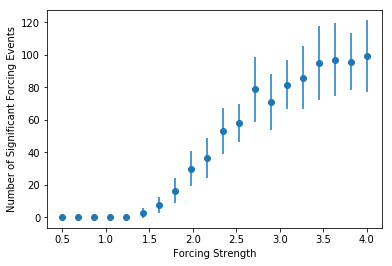

In [22]:
plt.errorbar(fpeaks,nevents,yerr=stdevents,fmt='o')
plt.xlabel("Forcing Strength")
plt.ylabel("Number of Significant Forcing Events")

In [23]:
len(favgnblocks)

20

Text(0, 0.5, 'Average Number of Blocking Events')

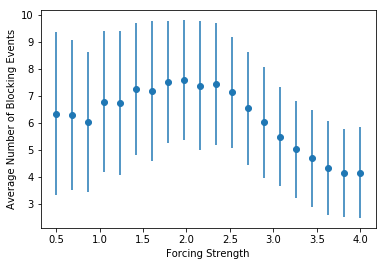

In [24]:
plt.errorbar(fpeaks,favgnblocks,yerr=fstdnblocks,fmt='o')
plt.xlabel("Forcing Strength")
plt.ylabel("Average Number of Blocking Events")

The way to understand this turnover is that blocks merge into larger blocks.

Text(0, 0.5, 'Average Number of Blocking Events per Significant Forcing')

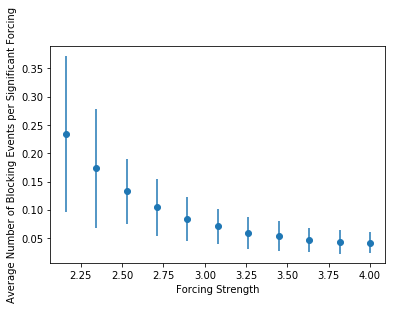

In [25]:
plt.errorbar(fpeaks,favgnblockspe,yerr=fstdnblockspe,fmt='o')
plt.xlabel("Forcing Strength")
plt.ylabel("Average Number of Blocking Events per Significant Forcing")

Text(0, 0.5, 'Blocking Pixels')

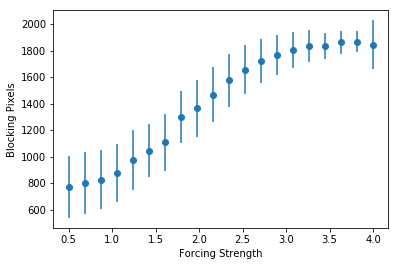

In [26]:
plt.errorbar(fpeaks,favgblocksz,yerr=fstdblocksz,fmt='o')
plt.xlabel("Forcing Strength")
plt.ylabel("Blocking Pixels")

Here we see a clear convergence toward perpetual blocking.

Text(0, 0.5, 'Blocking Pixels/Block')

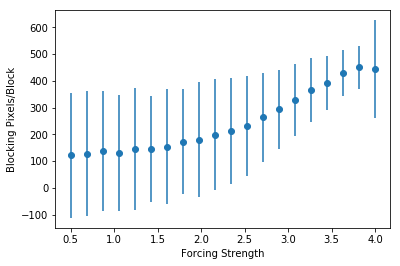

In [27]:
plt.errorbar(fpeaks,np.array(favgblocksz)/np.array(favgnblocks),
             yerr=np.sqrt(np.array(fstdnblocks)**2+np.array(fstdblocksz)**2),
             fmt='o')
plt.xlabel("Forcing Strength")
plt.ylabel("Blocking Pixels/Block")

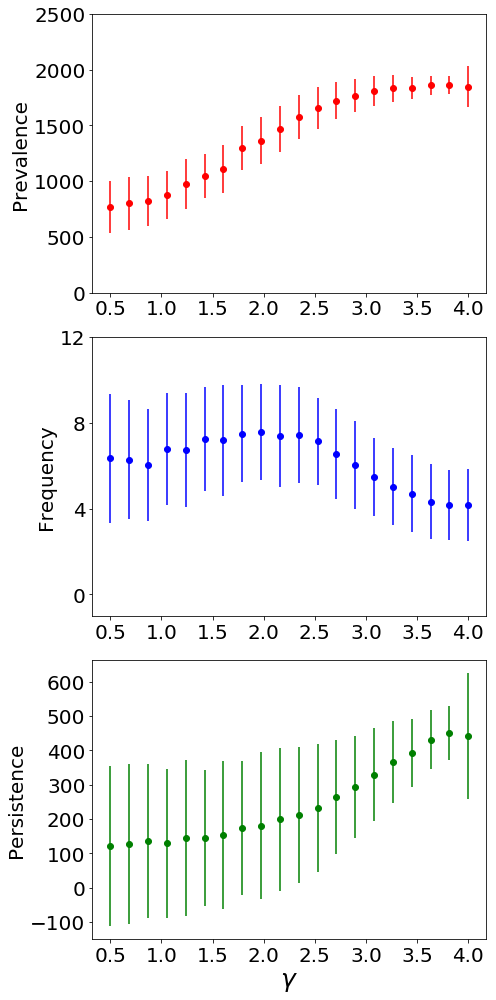

In [28]:
plt.figure(figsize=(7,14))

plt.subplot(3,1,1)

plt.errorbar(fpeaks,favgblocksz,yerr=fstdblocksz,fmt='ro')
# plt.xlabel("Forcing Strength")
# plt.xlabel("C(x) Amplitude", fontsize=18)
plt.ylabel("Prevalence", fontsize=20)
plt.yticks(np.arange(0,3000,500),fontsize=20)
plt.xticks(fontsize=20)

plt.subplot(3,1,2)

plt.errorbar(fpeaks,favgnblocks,yerr=fstdnblocks,fmt='bo')
plt.ylabel("Frequency", fontsize=20)
plt.xticks( fontsize=20)
plt.yticks(np.arange(0,14,4),fontsize=20)
plt.ylim(-1,12)


plt.subplot(3,1,3)


plt.errorbar(fpeaks,np.array(favgblocksz)/np.array(favgnblocks),
             yerr=np.sqrt(np.array(fstdnblocks)**2+np.array(fstdblocksz)**2),
             fmt='go')
plt.xlabel("Forcing Strength")
plt.ylabel("Persistence", fontsize=20)
# plt.title("Average Size/Duration of Each Block", fontsize=18,y=1.05)
# plt.ylim(-100,650)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r"$\gamma$", fontsize=25,y=1.2)

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Blocking Pixels per Significant Forcing')

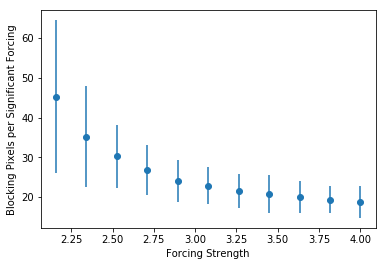

In [29]:
plt.errorbar(fpeaks,favgblockszpe,yerr=fstdblockszpe,fmt='o')
plt.xlabel("Forcing Strength")
plt.ylabel("Blocking Pixels per Significant Forcing")

Text(0, 0.5, 'Number of blocks')

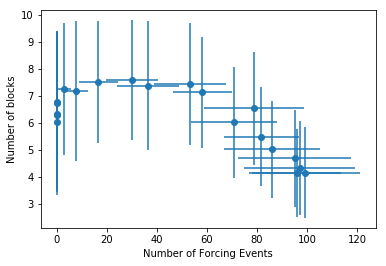

In [30]:
plt.errorbar(nevents,favgnblocks,xerr=stdevents,yerr=fstdnblocks,fmt='o')
plt.xlabel("Number of Forcing Events")
plt.ylabel("Number of blocks")

Text(0, 0.5, 'Average Block Size [pixels]')

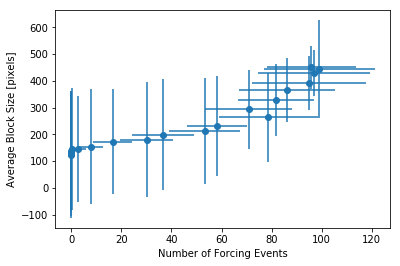

In [31]:
plt.errorbar(nevents,np.array(favgblocksz)/np.array(favgnblocks),
             xerr=stdevents,yerr=np.sqrt(np.array(fstdnblocks)**2+\
                                         np.array(fstdblocksz)**2),
             fmt='o')
plt.xlabel("Number of Forcing Events")
plt.ylabel("Average Block Size [pixels]")

### What effect does varying the strength of the C(x,t) perturbation have?

In [32]:
cstrength = np.load("cstrength.npy",encoding='latin1').item()

In [33]:
cstrengths = cstrength["var"]

In [34]:
cavgnblocks = []
cavgblocksz = []
cstdnblocks = []
cstdblocksz = []
cavgnblockspe = []
cavgblockszpe = []
cstdnblockspe = []
cstdblockszpe = []
cnevents = []
cstdevents = []

In [35]:
len(cstrength["data"])

10

In [36]:
for run in cstrength["data"]:
    cavgnblocks.append(run["avg_nblocks"])
    cavgblocksz.append(run["avg_blocksize"])
    cstdnblocks.append(run["std_nblocks"])
    cstdblocksz.append(run["std_blocksize"])
    cavgnblockspe.append(run["avg_nblocks_perevent"])
    cavgblockszpe.append(run["avg_blocksize_perevent"])
    cstdnblockspe.append(run["std_nblocks_perevent"])
    cstdblockszpe.append(run["std_blocksize_perevent"])
    eventsn = np.zeros(20)
    for n in range(0,20):
        eventsn[n] = len(run["forcing_coords"][n][0])
    cnevents.append(np.mean(eventsn))
    cstdevents.append(np.std(eventsn))

Text(0, 0.5, 'Number of Significant Forcing Events')

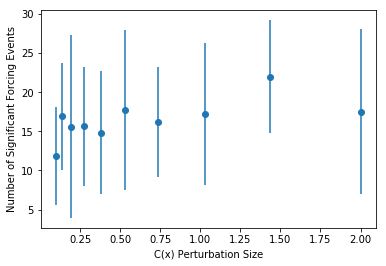

In [37]:
plt.errorbar(cstrengths,cnevents,yerr=cstdevents,fmt='o')
plt.xlabel("C(x) Perturbation Size")
plt.ylabel("Number of Significant Forcing Events")

In [38]:
len(cavgnblocks)

10

Text(0, 0.5, 'Average Number of Blocking Events')

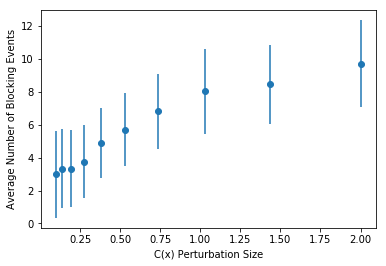

In [39]:
plt.errorbar(cstrengths,cavgnblocks,yerr=cstdnblocks,fmt='o')
plt.xlabel("C(x) Perturbation Size")
plt.ylabel("Average Number of Blocking Events")

## 2b

Text(0, 0.5, 'Average Number of Blocking Events per Significant Forcing')

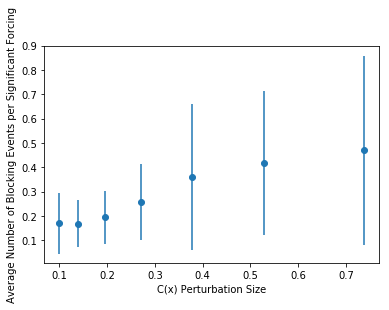

In [40]:
plt.errorbar(cstrengths,cavgnblockspe,yerr=cstdnblockspe,fmt='o')
plt.xlabel("C(x) Perturbation Size")
plt.ylabel("Average Number of Blocking Events per Significant Forcing")

Text(0, 0.5, 'Blocking Pixels')

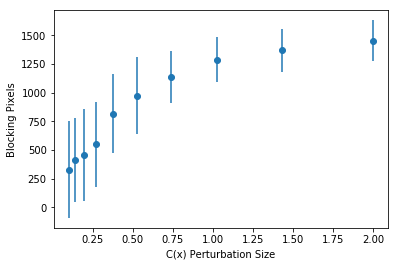

In [41]:
plt.errorbar(cstrengths,cavgblocksz,yerr=cstdblocksz,fmt='o')
plt.xlabel("C(x) Perturbation Size")
plt.ylabel("Blocking Pixels")
## 2a

Text(0, 0.5, 'Blocking Pixels/Block')

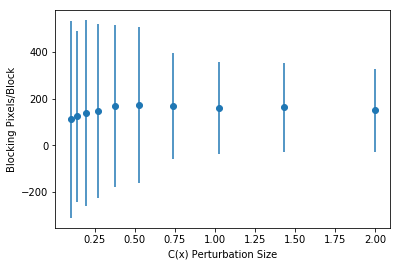

In [42]:
plt.errorbar(cstrengths,np.array(cavgblocksz)/np.array(cavgnblocks),
             yerr=np.sqrt(np.array(cstdnblocks)**2+np.array(cstdblocksz)**2),
             fmt='o')
plt.xlabel("C(x) Perturbation Size")
plt.ylabel("Blocking Pixels/Block")

## 2c

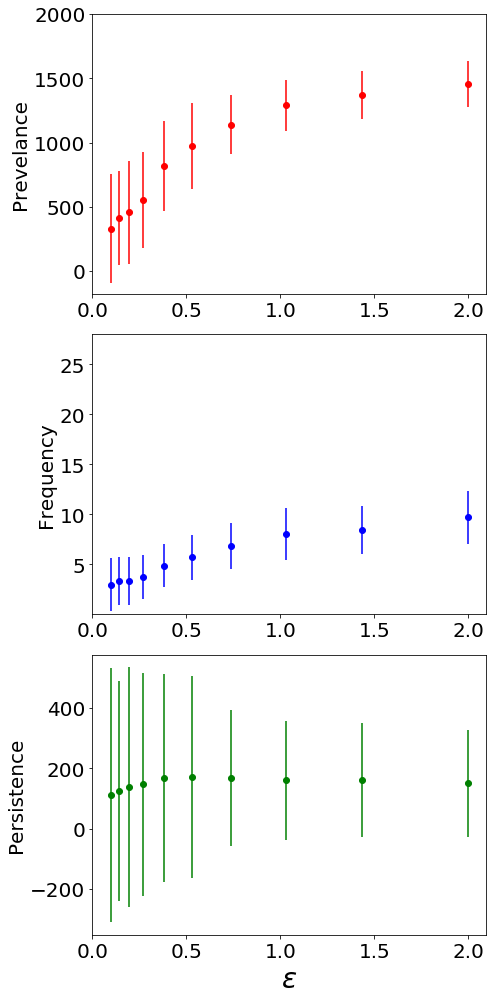

In [43]:
plt.figure(figsize=(7,14))

plt.subplot(3,1,1)

plt.errorbar(cstrengths,cavgblocksz,yerr=cstdblocksz,fmt='ro')
# plt.xlabel("C(x) Amplitude", fontsize=18)
plt.ylabel("Prevelance", fontsize=20)
# plt.title("Prevalence of Blocking", fontsize=18, y=1.05)
plt.xticks(np.arange(0,2.5,0.5),fontsize=20)
plt.yticks(np.arange(0,1800+500,500),fontsize=20)

plt.subplot(3,1,2)

plt.errorbar(cstrengths,cavgnblocks,yerr=cstdnblocks,fmt='bo')
# plt.xlabel("C(x) Amplitude", fontsize=18)
plt.ylabel("Frequency", fontsize=20)
# plt.title("Blocking Frequency", fontsize=18,y=1.05)
plt.xticks(np.arange(0,2.5,0.5),fontsize=20)
plt.yticks(np.arange(5,30,5),fontsize=20)
plt.ylim(0,28)


plt.subplot(3,1,3)
plt.errorbar(cstrengths,np.array(cavgblocksz)/np.array(cavgnblocks),
             yerr=np.sqrt(np.array(cstdnblocks)**2+np.array(cstdblocksz)**2),
             fmt='go')
plt.ylabel("Persistence", fontsize=20)
# plt.title("Average Size/Duration of Each Block", fontsize=18,y=1.05)
plt.xticks(np.arange(0,2.5,0.5),fontsize=20)
plt.yticks(fontsize=20)
# plt.ylim(0,500)

plt.xlabel(r"$\epsilon$", fontsize=28,y=1.10)


plt.tight_layout()
# plt.savefig('figure_pdf/perturbation.pdf')
plt.show()


Text(0, 0.5, 'Blocking Pixels per Significant Forcing')

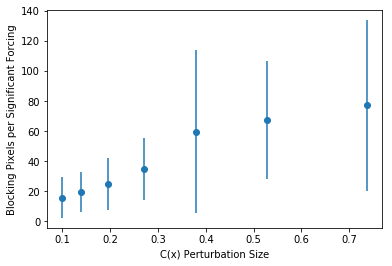

In [44]:
plt.errorbar(cstrengths,cavgblockszpe,yerr=cstdblockszpe,fmt='o')
plt.xlabel("C(x) Perturbation Size")
plt.ylabel("Blocking Pixels per Significant Forcing")

Text(0, 0.5, 'Number of blocks')

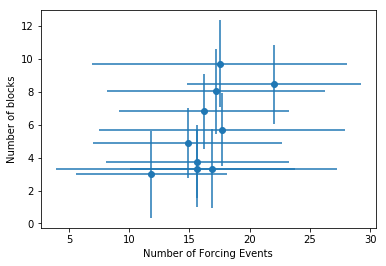

In [45]:
plt.errorbar(cnevents,cavgnblocks,xerr=cstdevents,yerr=cstdnblocks,fmt='o')
plt.xlabel("Number of Forcing Events")
plt.ylabel("Number of blocks")

Text(0, 0.5, 'Average Block Size [pixels]')

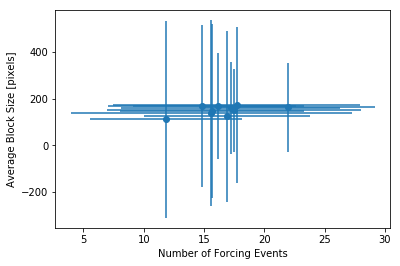

In [46]:
plt.errorbar(cnevents,np.array(cavgblocksz)/np.array(cavgnblocks),
             xerr=cstdevents,yerr=np.sqrt(np.array(cstdnblocks)**2+\
                                          np.array(cstdblocksz)**2),
             fmt='o')
plt.xlabel("Number of Forcing Events")
plt.ylabel("Average Block Size [pixels]")

### Let's do quick runs where we hold the forcing constant--no statistics yet.

We'll look at varying $\beta$ and also $A_0$.

In [49]:
cx_beta = np.load("cx_a0y.npy",encoding='latin1').item()

In [50]:
cx_a0y = np.load("cx_beta.npy",encoding='latin1').item()

In [51]:
for k in sorted(cx_a0y.keys()):
    print(k)

a0y
block_coords
c(x)_init
cx_peak
forcing_coords
forcing_init
forcing_peak
raw_blocksize
raw_blocksize_perevent
raw_nblocks
raw_nblocks_perevent


Text(0.5, 1.0, 'Forcing unchanging; Varying amplitude of A$_0$')

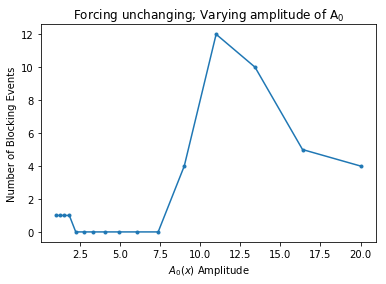

In [52]:
plt.plot(cx_a0y["a0y"],cx_a0y["raw_nblocks"],marker='.')
plt.xlabel("$A_0(x)$ Amplitude")
plt.ylabel("Number of Blocking Events")
plt.title("Forcing unchanging; Varying amplitude of A$_0$")

Text(0.5, 1.0, 'Forcing unchanging; Varying amplitude of A$_0$')

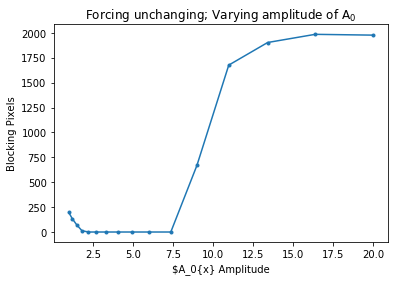

In [53]:
plt.plot(cx_a0y["a0y"],cx_a0y["raw_blocksize"],marker='.')
plt.xlabel("$A_0{x} Amplitude")
plt.ylabel("Blocking Pixels")
plt.title("Forcing unchanging; Varying amplitude of A$_0$")

/project2/tas1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Forcing unchanging; Varying amplitude of A$_0$')

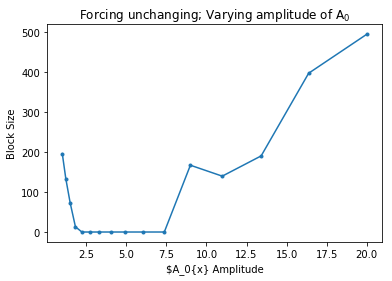

In [54]:
avgsize = cx_a0y["raw_blocksize"]/cx_a0y["raw_nblocks"]
plt.plot(cx_a0y["a0y"],np.nan_to_num(avgsize),marker='.')
plt.xlabel("$A_0{x} Amplitude")
plt.ylabel("Block Size")
plt.title("Forcing unchanging; Varying amplitude of A$_0$")

Text(0.5, 1.0, 'Forcing unchanging; Varying $\\beta$')

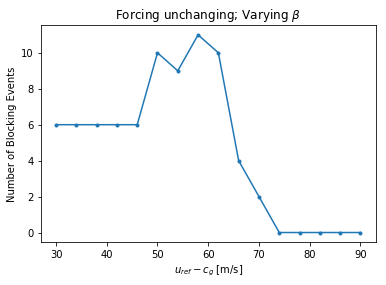

In [55]:
plt.plot(cx_beta["beta"],cx_beta["raw_nblocks"],marker='.')
plt.xlabel("$u_{ref}-c_g$ [m/s]")
plt.ylabel("Number of Blocking Events")
plt.title("Forcing unchanging; Varying $\\beta$")

Text(0.5, 1.0, 'Forcing unchanging; Varying $\\beta$')

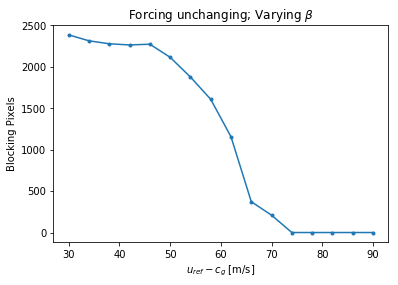

In [56]:
plt.plot(cx_beta["beta"],cx_beta["raw_blocksize"],marker='.')
plt.xlabel("$u_{ref}-c_g$ [m/s]")
plt.ylabel("Blocking Pixels")
plt.title("Forcing unchanging; Varying $\\beta$")

/home/pragallva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Forcing unchanging; Varying $\\beta$')

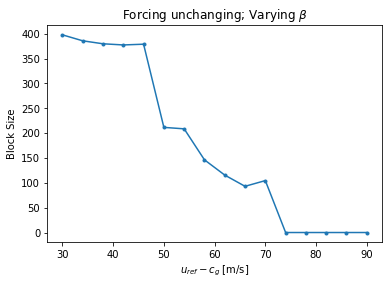

In [55]:
avgsize = cx_beta["raw_blocksize"]/cx_beta["raw_nblocks"]
plt.plot(cx_beta["beta"],np.nan_to_num(avgsize),marker='.')
plt.xlabel("$u_{ref}-c_g$ [m/s]")
plt.ylabel("Block Size")
plt.title("Forcing unchanging; Varying $\\beta$")

### What if we vary the background amplitude $A_0$ with statistics?

We'll do a few hundred runs for each parameter combination to compute mean and standard deviation.

In [58]:
cxy = np.load("cxy.npy",encoding='latin1').item()
cxb = np.load("beta.npy",encoding='latin1').item()

In [59]:
ampls = cxy["var"]

In [60]:
yavgnblocks = []
yavgblocksz = []
ystdnblocks = []
ystdblocksz = []
yavgnblockspe = []
yavgblockszpe = []
ystdnblockspe = []
ystdblockszpe = []
ynevents = []
ystdevents = []

In [61]:
len(cxy["data"])

16

In [62]:
for run in cxy["data"]:
    yavgnblocks.append(run["avg_nblocks"])
    yavgblocksz.append(run["avg_blocksize"])
    ystdnblocks.append(run["std_nblocks"])
    ystdblocksz.append(run["std_blocksize"])
    yavgnblockspe.append(run["avg_nblocks_perevent"])
    yavgblockszpe.append(run["avg_blocksize_perevent"])
    ystdnblockspe.append(run["std_nblocks_perevent"])
    ystdblockszpe.append(run["std_blocksize_perevent"])
    eventsn = np.zeros(20)
    for n in range(0,20):
        eventsn[n] = len(run["forcing_coords"][n][0])
    ynevents.append(np.mean(eventsn))
    ystdevents.append(np.std(eventsn))

Text(0, 0.5, 'Number of Significant Forcing Events')

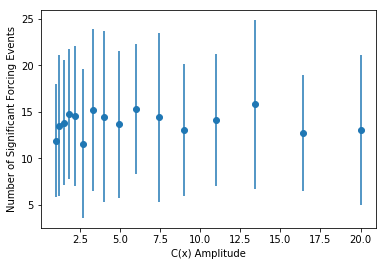

In [63]:
plt.errorbar(ampls,ynevents,yerr=ystdevents,fmt='o')
plt.xlabel("C(x) Amplitude")
plt.ylabel("Number of Significant Forcing Events")

In [64]:
len(yavgnblocks)

16

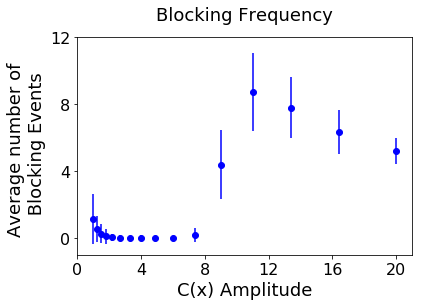

In [65]:
plt.errorbar(ampls,yavgnblocks,yerr=ystdnblocks,fmt='bo')
plt.xlabel("C(x) Amplitude", fontsize=18)
plt.ylabel("Average number of \n Blocking Events", fontsize=18)
plt.title("Blocking Frequency", fontsize=18,y=1.05)
plt.savefig("cx_nblocks.png",bbox_inches='tight')
plt.xticks(np.arange(0,21,4),fontsize=16)
plt.yticks(np.arange(0,14,4),fontsize=16)
plt.xlim(0,21)
plt.ylim(-1,12)
plt.show()
# plt.tick_params(labelsize=16)
# plt.savefig("figure_pdf/")

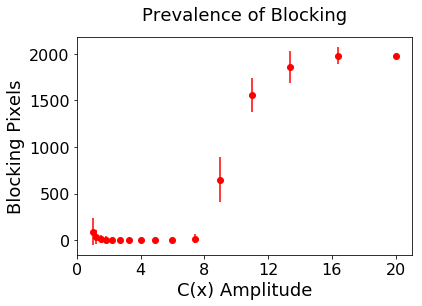

In [66]:
plt.errorbar(ampls,yavgblocksz,yerr=ystdblocksz,fmt='ro')
plt.xlabel("C(x) Amplitude", fontsize=18)
plt.ylabel("Blocking Pixels", fontsize=18)
plt.title("Prevalence of Blocking", fontsize=18, y=1.05)
plt.xticks(np.arange(0,21,4),fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0,21)
plt.show()
# plt.savefig("cx_blocksize.png",bbox_inches='tight')
# # plt.savefig("figure_pdf/")

/project2/tas1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


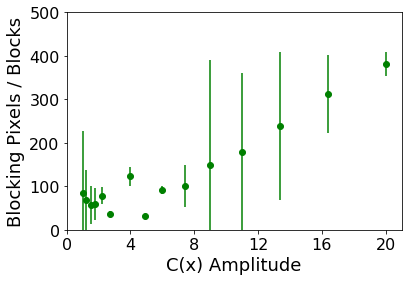

In [67]:
plt.errorbar(ampls,np.array(yavgblocksz)/np.array(yavgnblocks),
             yerr=np.sqrt(np.array(ystdnblocks)**2+np.array(ystdblocksz)**2),
             fmt='go')
plt.xlabel("C(x) Amplitude", fontsize=18)
plt.ylabel("Blocking Pixels / Blocks", fontsize=18)
# plt.title("Average Size/Duration of Each Block", fontsize=18,y=1.05)
plt.xticks(np.arange(0,21,4),fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0,21)
plt.ylim(0,500)
plt.show()
#plt.savefig("figure_pdf/")
# plt.savefig("cx_avgblocksize.png",bbox_inches='tight')


/project2/tas1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


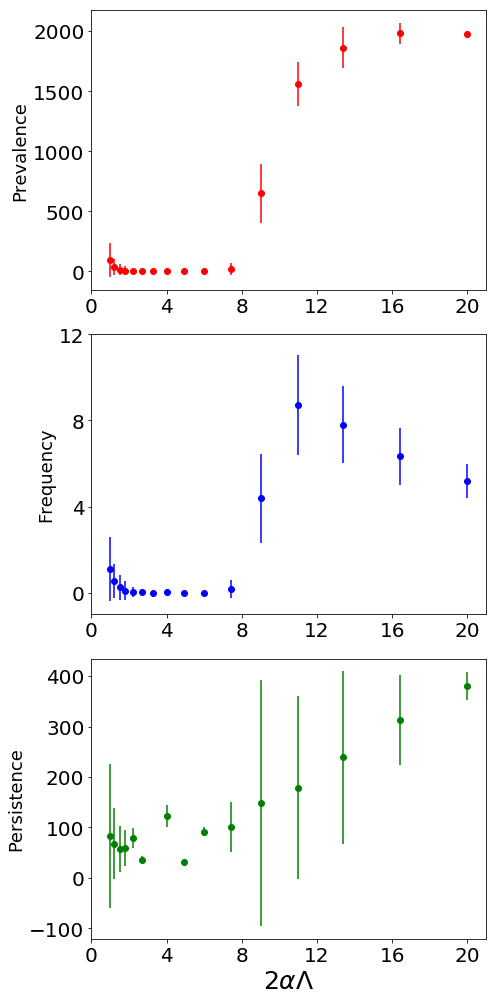

In [68]:
plt.figure(figsize=(7,14))

plt.subplot(3,1,1)

plt.errorbar(ampls,yavgblocksz,yerr=ystdblocksz,fmt='ro')
# plt.xlabel("C(x) Amplitude", fontsize=18)
plt.ylabel("Prevalence", fontsize=18)
# plt.title("Prevalence of Blocking", fontsize=18, y=1.05)
plt.xticks(np.arange(0,21,4),fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,21)

plt.subplot(3,1,2)

plt.errorbar(ampls,yavgnblocks,yerr=ystdnblocks,fmt='bo')
# plt.xlabel("C(x) Amplitude", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
# plt.title("Blocking Frequency", fontsize=18,y=1.05)
plt.xticks(np.arange(0,21,4),fontsize=20)
plt.yticks(np.arange(0,14,4),fontsize=20)
plt.xlim(0,21)
plt.ylim(-1,12)


plt.subplot(3,1,3)
plt.errorbar(ampls,np.array(yavgblocksz)/np.array(yavgnblocks),
             yerr=np.sqrt(np.array(ystdnblocks)**2+np.array(ystdblocksz)**2),
             fmt='go')
plt.ylabel("Persistence", fontsize=18)
# plt.title("Average Size/Duration of Each Block", fontsize=18,y=1.05)
plt.xticks(np.arange(0,21,4),fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,21)
# plt.ylim(0,500)

plt.xlabel(r"$2\alpha\Lambda$", fontsize=25,y=1.10)


plt.tight_layout()
plt.show()


Text(0, 0.5, 'Number of blocks')

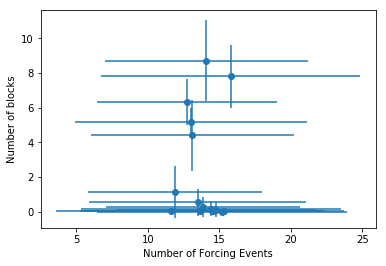

In [69]:
plt.errorbar(ynevents,yavgnblocks,xerr=ystdevents,yerr=ystdnblocks,fmt='o')
plt.xlabel("Number of Forcing Events")
plt.ylabel("Number of blocks")

/project2/tas1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Average Block Size [pixels]')

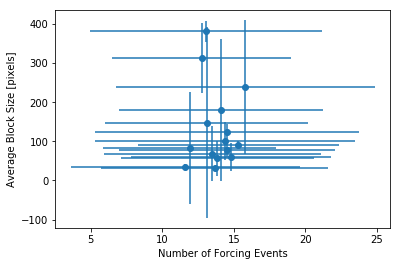

In [70]:
plt.errorbar(ynevents,np.array(yavgblocksz)/np.array(yavgnblocks),
             xerr=ystdevents,yerr=np.sqrt(np.array(ystdnblocks)**2+\
                                          np.array(ystdblocksz)**2),
             fmt='o')
plt.xlabel("Number of Forcing Events")
plt.ylabel("Average Block Size [pixels]")

### What if we vary the reference flow speed $\beta$?

In [71]:
betas = cxb["var"]

In [72]:
bavgnblocks = []
bavgblocksz = []
bstdnblocks = []
bstdblocksz = []
bavgnblockspe = []
bavgblockszpe = []
bstdnblockspe = []
bstdblockszpe = []
bnevents = []
bstdevents = []

In [73]:
len(cxb["data"])

16

In [74]:
for run in cxb["data"]:
    bavgnblocks.append(run["avg_nblocks"])
    bavgblocksz.append(run["avg_blocksize"])
    bstdnblocks.append(run["std_nblocks"])
    bstdblocksz.append(run["std_blocksize"])
    bavgnblockspe.append(run["avg_nblocks_perevent"])
    bavgblockszpe.append(run["avg_blocksize_perevent"])
    bstdnblockspe.append(run["std_nblocks_perevent"])
    bstdblockszpe.append(run["std_blocksize_perevent"])
    eventsn = np.zeros(20)
    for n in range(0,20):
        eventsn[n] = len(run["forcing_coords"][n][0])
    bnevents.append(np.mean(eventsn))
    bstdevents.append(np.std(eventsn))

In [75]:
run.keys()

dict_keys(['a0y', 'avg_blocksize', 'std_nblocks', 'std_blocksize', 'std_blocksize_perevent', 'cx_peak', 'beta', 'forcing_peak', 'raw_nblocks_perevent', 'block_coords', 'raw_nblocks', 'raw_blocksize', 'avg_nblocks_perevent', 'forcing_coords', 'c(x)_init', 'forcing_init', 'std_nblocks_perevent', 'avg_blocksize_perevent', 'avg_nblocks', 'raw_blocksize_perevent'])

Text(0, 0.5, 'Number of Significant Forcing Events')

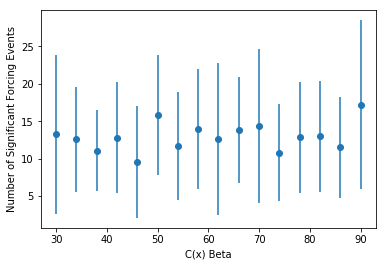

In [76]:
plt.errorbar(betas,bnevents,yerr=bstdevents,fmt='o')
plt.xlabel("C(x) Beta")
plt.ylabel("Number of Significant Forcing Events")

In [77]:
len(bavgnblocks)

16

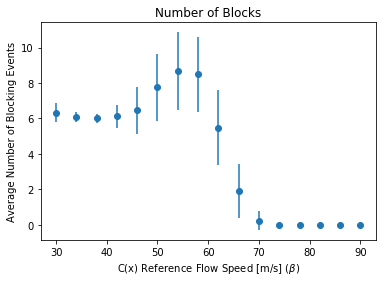

In [78]:
plt.errorbar(betas,bavgnblocks,yerr=bstdnblocks,fmt='o')
plt.xlabel("C(x) Reference Flow Speed [m/s] ($\\beta$)")
plt.ylabel("Average Number of Blocking Events")
plt.title("Number of Blocks")
plt.savefig("beta_nblocks.png",bbox_inches='tight')

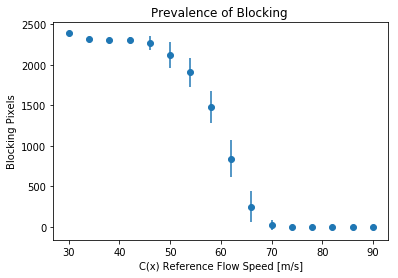

In [80]:
plt.errorbar(betas,bavgblocksz,yerr=bstdblocksz,fmt='o')
plt.xlabel("C(x) Reference Flow Speed [m/s]")
plt.ylabel("Blocking Pixels")
plt.title("Prevalence of Blocking ")
plt.savefig("beta_blocksize.png",bbox_inches='tight')

/project2/tas1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


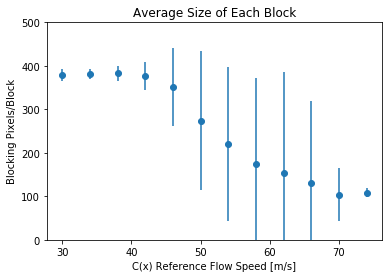

In [81]:
plt.errorbar(betas,np.array(bavgblocksz)/np.array(bavgnblocks),
             yerr=np.sqrt(np.array(bstdnblocks)**2+\
                          np.array(bstdblocksz)**2),fmt='o')
plt.xlabel("C(x) Reference Flow Speed [m/s]")
plt.ylabel("Blocking Pixels/Block")
plt.title("Average Size of Each Block")
plt.ylim(0,500)
plt.savefig("beta_avgblocksize.png",bbox_inches='tight')

/project2/tas1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


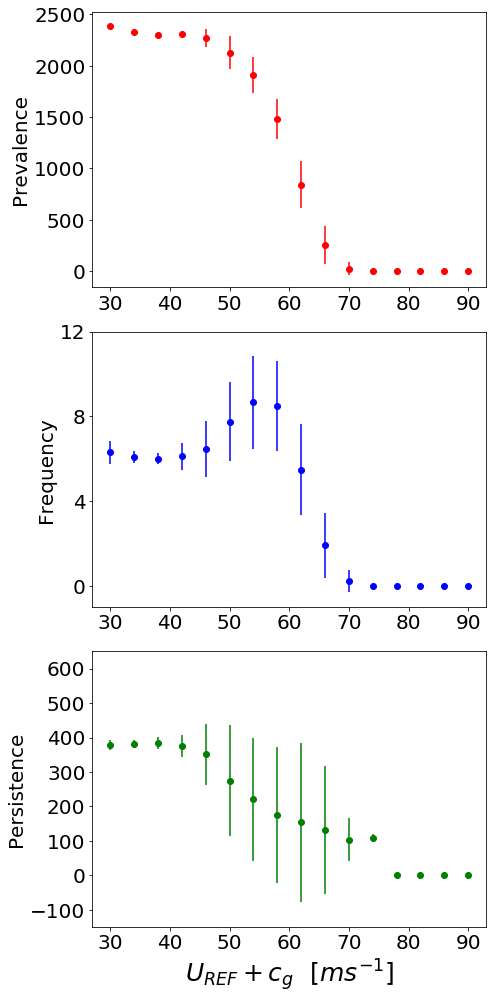

In [82]:
plt.figure(figsize=(7,14))

plt.subplot(3,1,1)

plt.errorbar(betas,bavgblocksz,yerr=bstdblocksz,fmt='ro')
#plt.savefig("beta_blocksize.png",bbox_inches='tight')
# plt.xlabel("C(x) Amplitude", fontsize=18)
plt.ylabel("Prevalence", fontsize=20)
plt.yticks(np.arange(0,3000,500),fontsize=20)
plt.xticks(fontsize=20)

plt.subplot(3,1,2)

plt.errorbar(betas,bavgnblocks,yerr=bstdnblocks,fmt='bo')
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(np.arange(0,14,4),fontsize=20)
plt.ylim(-1,12)



plt.subplot(3,1,3)

ratio=np.array(bavgblocksz)/np.array(bavgnblocks)
ratio[-1]=0; ratio[-2]=0; ratio[-3]=0; ratio[-4]=0

plt.errorbar(betas,ratio,
             yerr=np.sqrt(np.array(bstdnblocks)**2+\
                          np.array(bstdblocksz)**2),fmt='go')
plt.ylabel("Persistence", fontsize=20)
# plt.title("Average Size/Duration of Each Block", fontsize=20,y=1.05)
plt.ylim(-150,650)
plt.xlim(27,93)
plt.xticks(np.arange(30,100,10),fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r"$U_{REF}+c_{g}\:\:\:[ms^{-1}]$", fontsize=25,y=1.2)


plt.tight_layout()

# plt.savefig("figure_pdf/beta.pdf")
plt.show()


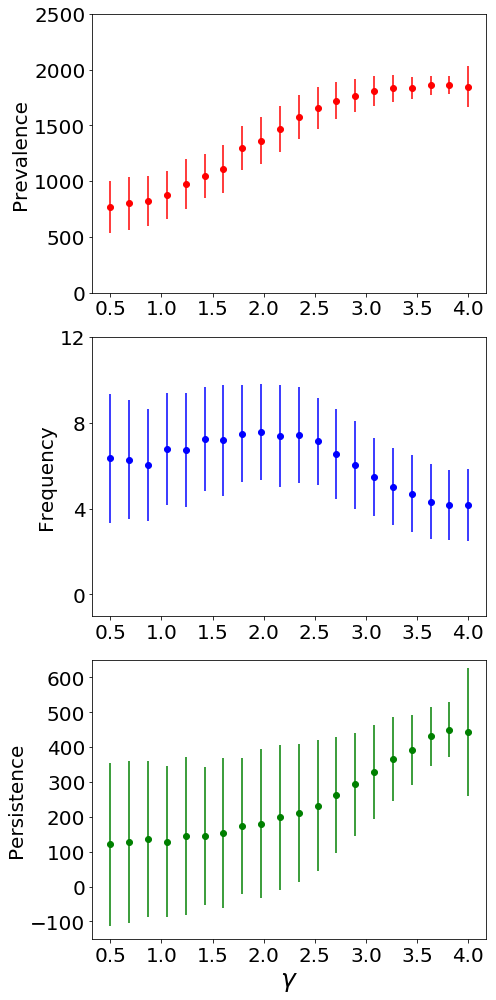

In [83]:
plt.figure(figsize=(7,14))

plt.subplot(3,1,1)

plt.errorbar(fpeaks,favgblocksz,yerr=fstdblocksz,fmt='ro')
# plt.xlabel("Forcing Strength")
# plt.xlabel("C(x) Amplitude", fontsize=18)
plt.ylabel("Prevalence", fontsize=20)
plt.yticks(np.arange(0,3000,500),fontsize=20)
plt.xticks(fontsize=20)

plt.subplot(3,1,2)

plt.errorbar(fpeaks,favgnblocks,yerr=fstdnblocks,fmt='bo')
plt.ylabel("Frequency", fontsize=20)
plt.xticks( fontsize=20)
plt.yticks(np.arange(0,14,4),fontsize=20)
plt.ylim(-1,12)

plt.subplot(3,1,3)
plt.errorbar(fpeaks,np.array(favgblocksz)/np.array(favgnblocks),
             yerr=np.sqrt(np.array(fstdnblocks)**2+np.array(fstdblocksz)**2),
             fmt='go')
plt.xlabel("Forcing Strength")
plt.ylabel("Persistence", fontsize=20)
# plt.title("Average Size/Duration of Each Block", fontsize=18,y=1.05)
plt.ylim(-150,650)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r"$\gamma$", fontsize=25,y=1.2)

plt.tight_layout()
# plt.savefig("figure_pdf/gamma.pdf")
plt.show()


/project2/tas1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


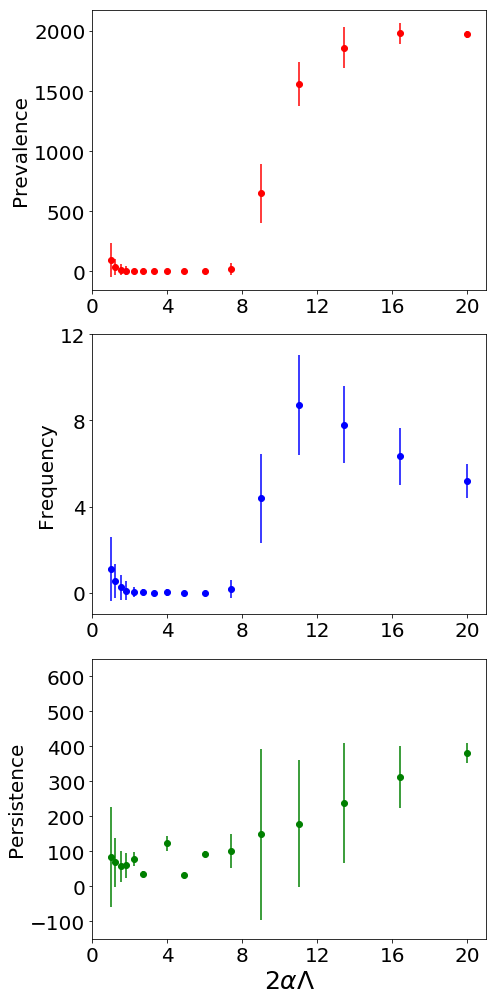

In [84]:
plt.figure(figsize=(7,14))

plt.subplot(3,1,1)

plt.errorbar(ampls,yavgblocksz,yerr=ystdblocksz,fmt='ro')
# plt.xlabel("C(x) Amplitude", fontsize=20)
plt.ylabel("Prevalence", fontsize=20)
# plt.title("Prevalence of Blocking", fontsize=18, y=1.05)
plt.xticks(np.arange(0,21,4),fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,21)

plt.subplot(3,1,2)

plt.errorbar(ampls,yavgnblocks,yerr=ystdnblocks,fmt='bo')
# plt.xlabel("C(x) Amplitude", fontsize=18)
plt.ylabel("Frequency", fontsize=20)
# ax = plt.gca() 
# ax.yaxis.set_label_coords(0.5, -1.0) 
# plt.title("Blocking Frequency", fontsize=18,y=1.05)
plt.savefig("cx_nblocks.png",bbox_inches='tight')
plt.xticks(np.arange(0,21,4),fontsize=20)
plt.yticks(np.arange(0,14,4),fontsize=20)
plt.xlim(0,21)
plt.ylim(-1,12)


plt.subplot(3,1,3)
plt.errorbar(ampls,np.array(yavgblocksz)/np.array(yavgnblocks),
             yerr=np.sqrt(np.array(ystdnblocks)**2+np.array(ystdblocksz)**2),
             fmt='go')
plt.ylabel("Persistence", fontsize=20)
# plt.title("Average Size/Duration of Each Block", fontsize=18,y=1.05)
plt.xticks(np.arange(0,21,4),fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,21)
plt.ylim(-150,650)

plt.xlabel(r"$2\alpha\Lambda$", fontsize=25,y=1.10)


plt.tight_layout()

# plt.savefig("figure_pdf/lambda.pdf")
plt.show()


Text(0, 0.5, 'Number of blocks')

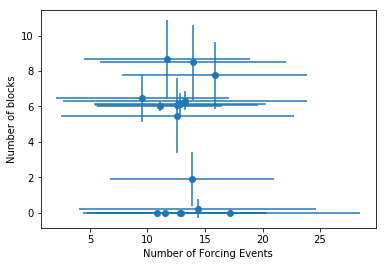

In [85]:
plt.errorbar(bnevents,bavgnblocks,xerr=bstdevents,yerr=bstdnblocks,fmt='o')
plt.xlabel("Number of Forcing Events")
plt.ylabel("Number of blocks")

/project2/tas1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Average Block Size [pixels]')

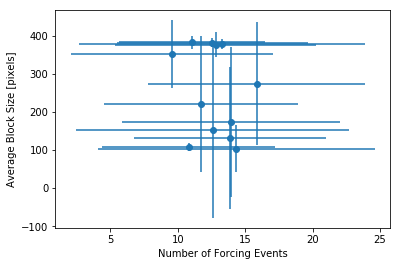

In [86]:
plt.errorbar(bnevents,np.array(bavgblocksz)/np.array(bavgnblocks),
             xerr=bstdevents,yerr=np.sqrt(np.array(bstdnblocks)**2+\
                                          np.array(bstdblocksz)**2),
             fmt='o')
plt.xlabel("Number of Forcing Events")
plt.ylabel("Average Block Size [pixels]")

In [87]:
cxbgrid = np.load("cx_bygrid2.npy",encoding='latin1').item()

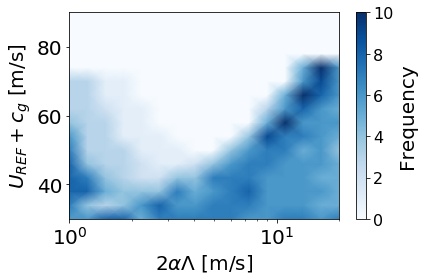

In [88]:
im=plt.pcolormesh(cxbgrid["a0y"],cxbgrid["beta"],cxbgrid["nblocks"],
                  shading='Gouraud',cmap='Blues')
plt.xscale('log')
plt.ylabel(r"$U_{REF}+c_g$ [m/s]",fontsize=20)
plt.xlabel(r"$2\alpha \Lambda $ [m/s]",fontsize=20)
plt.tick_params(labelsize=20)
cb = plt.colorbar(im)
cb.ax.tick_params(labelsize=16)
cb.ax.set_ylabel("Frequency", fontsize=20)
# plt.title("Prevalence of Blocking",fontsize=20)
plt.tight_layout()
# plt.savefig("figure_pdf/grid_nblocks.pdf")



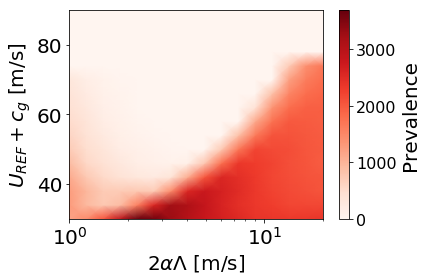

In [89]:
im=plt.pcolormesh(cxbgrid["a0y"],cxbgrid["beta"],cxbgrid["blocksize"],
                  shading='Gouraud',cmap='Reds')
plt.tick_params(labelsize=20)
plt.xscale('log')
plt.xlabel("C(x) Amplitude",fontsize=20)
# plt.ylabel("Reference Flow Speed [m/s]",fontsize=20)
plt.ylabel(r"$U_{REF}+c_g$ [m/s]",fontsize=20)
plt.xlabel(r"$2\alpha \Lambda $ [m/s]",fontsize=20)

cb = plt.colorbar(im)
cb.ax.tick_params(labelsize=16)
cb.ax.set_ylabel("Prevalence", fontsize=20)
# plt.title("Prevalence of Blocking",fontsize=20)
plt.tight_layout()
# plt.savefig("figure_pdf/grid_blocksz.pdf")


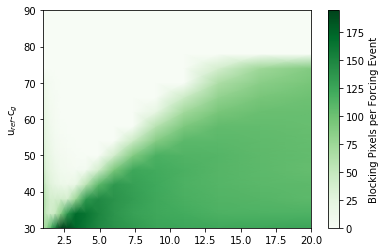

In [110]:
im=plt.pcolormesh(cxbgrid["a0y"],cxbgrid["beta"],
                  cxbgrid["blocksize_perevent"],shading='Gouraud',cmap='Greens')
plt.axvline(10.0,ymin=50, ymax=70)
# plt.xscale('log')
plt.ylabel("u$_{ref}$-c$_g$")
plt.colorbar(im,label="Blocking Pixels per Forcing Event")


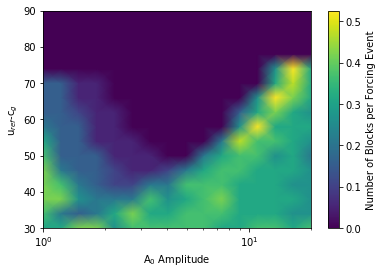

In [94]:
im=plt.pcolormesh(cxbgrid["a0y"],cxbgrid["beta"],
                  cxbgrid["nblocks_perevent"],shading='Gouraud')
plt.xscale('log')
plt.xlabel("A$_0$ Amplitude")
plt.ylabel("u$_{ref}$-c$_g$")
plt.colorbar(im,label="Number of Blocks per Forcing Event")

/project2/tas1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


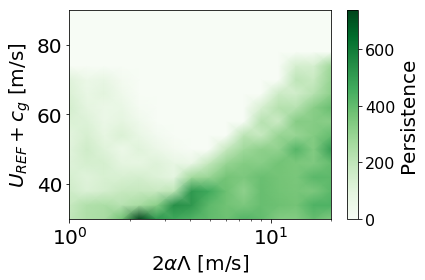

In [95]:
im=plt.pcolormesh(cxbgrid["a0y"],cxbgrid["beta"],
                  np.nan_to_num(cxbgrid["blocksize"]/cxbgrid["nblocks"]),
                  shading='Gouraud',cmap='Greens')
plt.xscale('log')
plt.xscale('log')
plt.tick_params(labelsize=20)
# plt.ylabel("Reference Flow Speed [m/s]",fontsize=20)
plt.ylabel(r"$U_{REF}+c_g$ [m/s]",fontsize=20)
plt.xlabel(r"$2\alpha \Lambda $ [m/s]",fontsize=20)
cb=plt.colorbar(im) #,label="Pixels per Block")
cb.ax.tick_params(labelsize=16)
cb.ax.set_ylabel("Persistence", fontsize=20)
# plt.title("Prevalence of Blocking",fontsize=20)
plt.tight_layout()
# plt.savefig("figure_pdf/pixels_per_block.pdf")

## Overall conclusion:

Increasing perturbation or forcing strength promotes blocking. Within the context of $C(x,t)$, increasing the amplitude of the meander and reducing the mean flow speed promote blocking. The transition to quasi-perpetual blocking is relatively sharp, which suggests a potential weakness of the model. The increase in blocking at the limit of low meander and low flow speed corresponds to forcing events being able to cause blocking events wherever they occur (rather than preferentially on background crests), thus why the size of each block is very small in that regime, as well as some false positives, and approaching the regime of spontaneous perpetual blocking without external forcing.

### Does blocking depend on the integrated amount of forcing in a given event, or the intensity of the forcing?

We use a single Gaussian forcing, of the same form used in Noboru's paper. We vary the width in x or t, reducing the peak intensity accordingly to maintain the same integrated amount of forcing. If the effect depends on the integrated forcing, there should be no correlation in either number of blocks or size of block, since the integrated forcing is held constant.

In [90]:
ftw = np.load("forcing_tw.npy",encoding='latin1').item()
fxw = np.load("forcing_xw.npy",encoding='latin1').item()
fpk = np.load("forcing_pk.npy",encoding='latin1').item()

Text(0, 0.5, 'Number of blocks formed')

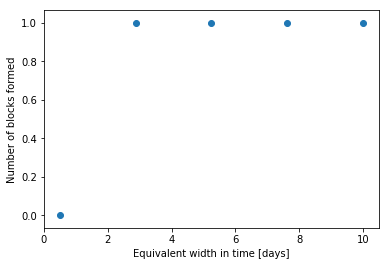

In [91]:
plt.scatter(ftw["tw"],ftw["nblocks"])
plt.xlabel("Equivalent width in time [days]")
plt.ylabel("Number of blocks formed")

The integrated forcing in time at least seems to matter.

Text(0, 0.5, 'Size of the blocking region [pixels]')

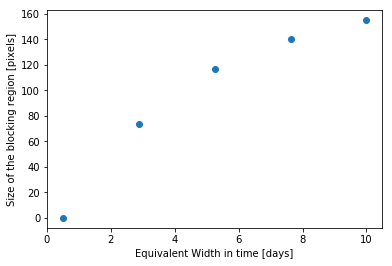

In [92]:
plt.scatter(ftw["tw"],ftw["blocksize"])
plt.xlabel("Equivalent Width in time [days]")
plt.ylabel("Size of the blocking region [pixels]")

However, longer but less intense events create larger blocks. So the equivalent width at least matters as well, not just the overall integrated forcing.

Text(0, 0.5, 'Number of blocks formed')

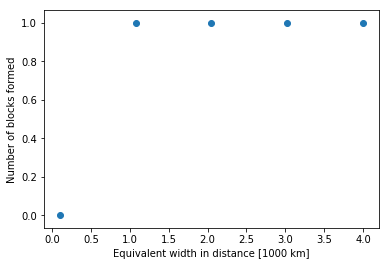

In [93]:
plt.scatter(fxw["xw"]/1000.0e3,fxw["nblocks"])
plt.xlabel("Equivalent width in distance [1000 km]")
plt.ylabel("Number of blocks formed")

Text(0, 0.5, 'Size of the blocking region [pixels]')

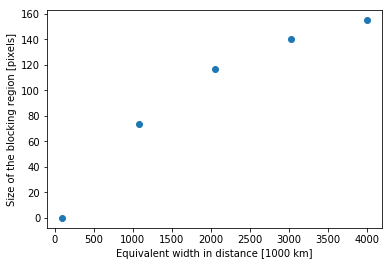

In [94]:
plt.scatter(fxw["xw"]/1.0e3,fxw["blocksize"])
plt.xlabel("Equivalent width in distance [1000 km]")
plt.ylabel("Size of the blocking region [pixels]")


Text(0, 0.5, 'Number of blocks formed')

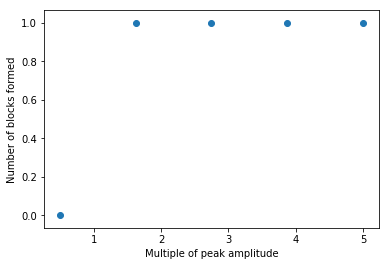

In [95]:
plt.scatter(fpk["peak"],fpk["nblocks"])
plt.xlabel("Multiple of peak amplitude")
plt.ylabel("Number of blocks formed")

Text(0, 0.5, 'Size of the blocking region [pixels]')

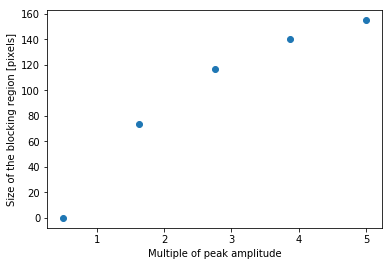

In [96]:
plt.scatter(fpk["peak"],fpk["blocksize"])
plt.xlabel("Multiple of peak amplitude")
plt.ylabel("Size of the blocking region [pixels]")

The conclusion we must therefore draw is that __both__ the integrated forcing and the intensity of the forcing matter.